In [24]:
import pandas as pd

In [3]:
'''
Machine Learning is divided into 3 categories :->

1. Supervised Learning -> Where Class,features and target variable is known
2. Unsupervised learning -> only featues are known to us. (identify cluster or class of the data)
3. Re-inforcement learning

'''

'\nMachine Learning is divided into 3 categories :->\n\n1. Supervised Learning -> Where Class,features and target variable is known\n2. Unsupervised learning -> only featues are known to us. (identify cluster or class of the data)\n3. Re-inforcement learning\n\n'

In [4]:
"""
K - means Algorithm.

1. Start with K centroids by putting them at random place. here k=2 means two centroids.

2. Compute distance of every point from centroid and cluster them accordingly.

3. Adjust the centroids so they become center of gravity for given cluster.

4. Again re-cluster every point based on their distance with centroid.

5. Again adjust centroids. 

6. Recompute clusters and repeat this till data points stop changing the clusters.

Everything is ok ... but how to determine what value of K should be given to the algorithm ????

There is a technique "Elbow Method" for this.

Sum of Squared Error (SSE) =  (from 0 to n)   sum(dist(xi-ci)**2)

SSE = SSE1 + SSE2 + SSE3 +.........................+ SSEn

Then, plot a graph ( K VS SSE).

Guidline is to find the elbow on the graph.........
                          i


"""

'\nK - means Algorithm.\n\n1. Start with K centroids by putting them at random place. here k=2 means two centroids.\n\n2. Compute distance of every point from centroid and cluster them accordingly.\n\n3. Adjust the centroids so they become center of gravity for given cluster.\n\n4. Again re-cluster every point based on their distance with centroid.\n\n5. Again adjust centroids. \n\n6. Recompute clusters and repeat this till data points stop changing the clusters.\n\nEverything is ok ... but how to determine what value of K should be given to the algorithm ????\n\nThere is a technique "Algo Method" for this.\n\nSum of Squared Error (SSE) =  (from 0 to n)   sum(dist(xi-ci)**2)\n\nSSE = SSE1 + SSE2 + SSE3 +.........................+ SSEn\n\nThen, plot a graph ( K VS SSE).\n\nGuidline is to find the elbow on the graph.........\n                          i\n\n\n'

In [25]:
data = pd.read_csv('income.csv')
data

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

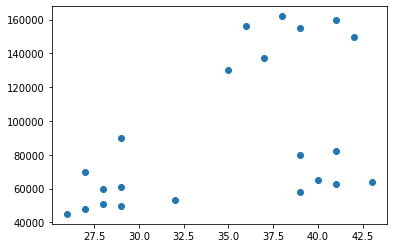

In [27]:
plt.scatter(data['Age'],data['Income($)'])

In [28]:
from sklearn.cluster import KMeans

In [29]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [30]:
y_predicted = km.fit_predict(data[['Age','Income($)']])
y_predicted

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [31]:
data['cluster'] = y_predicted
data

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


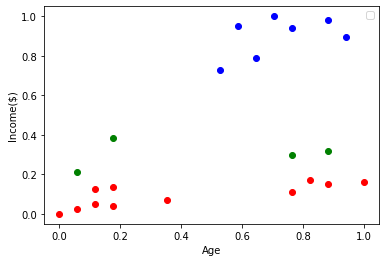

In [49]:
data1 = data[data.cluster==0]
data2 = data[data.cluster==1]
data3 = data[data.cluster==2]

plt.scatter(data1['Age'],data1['Income($)'],color='r')
plt.scatter(data2['Age'],data2['Income($)'],color='b')
plt.scatter(data3['Age'],data3['Income($)'],color='g')

plt.xlabel("Age")
plt.ylabel('Income($)')
plt.legend()

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Income($)'>

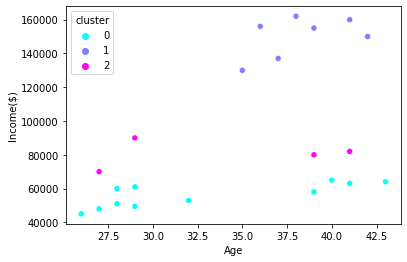

In [42]:
sns.scatterplot(data['Age'],data['Income($)'],hue=data['cluster'],palette='cool')

In [18]:
#let's fix this with MinMaxScaler

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
scaler = MinMaxScaler()

In [47]:
scaler.fit(data[['Income($)']])
data['Income($)'] = scaler.transform(data[['Income($)']])
data

scaler.fit(data[['Age']])
data['Age'] = scaler.transform(data[['Age']])
data

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [51]:
#now we need to train our madel again

In [52]:
y_predicted = km.fit_predict(data[['Age','Income($)']])
y_predicted

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [53]:
data['cluster'] = y_predicted
data

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Income($)'>

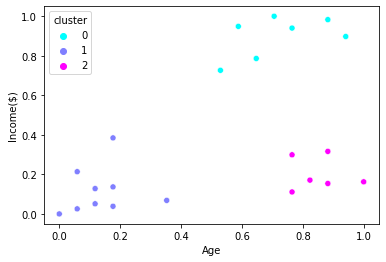

In [54]:
sns.scatterplot(data['Age'],data['Income($)'],hue=data['cluster'],palette='cool')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


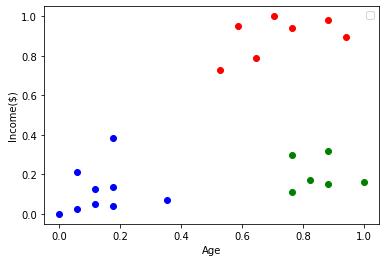

In [55]:
data1 = data[data.cluster==0]
data2 = data[data.cluster==1]
data3 = data[data.cluster==2]

plt.scatter(data1['Age'],data1['Income($)'],color='r')
plt.scatter(data2['Age'],data2['Income($)'],color='b')
plt.scatter(data3['Age'],data3['Income($)'],color='g')

plt.xlabel("Age")
plt.ylabel('Income($)')
plt.legend()

In [56]:
#now we can see both the graphs making sense

In [57]:
# but in real life data is going to be messy and a lot of data would be there.
#lets solve it.

In [61]:
k_rng = range(1,10)
sse =[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(data[['Age','Income($)']])
    sse.append(km.inertia_)

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

In [62]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.34910470944195643,
 0.2766936276300278,
 0.21878010893330446,
 0.16869711728567788,
 0.14257076249690032,
 0.10497488680620906]

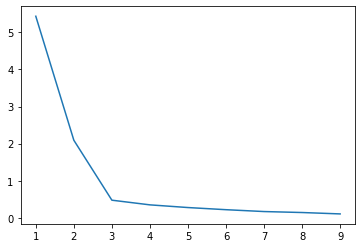

In [63]:
plt.plot(k_rng,sse)